In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tf
import math
import matplotlib as mpl
from scipy.stats import wilcoxon
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                    '20230420-nsyb-G7f-rAch1h/fly2',
                    '20230420-nsyb-G7f-rAch1h/fly3',
                    '20230428-nsyb-G7f-rAch1h/fly1',
                    '20230507-nsyb-G7f-rAch1h/fly1',
                    '20230510-nsyb-G7f-rAch1h/fly1',
                    '20230510-nsyb-G7f-rAch1h/fly2',
                    '20230511-nsyb-G7f-rAch1h/fly2',
                    '20230511-nsyb-G7f-rAch1h/fly3',
                    '20230515-nsyb-G7f-rAch1h/fly1']

## 5HT
file_folder_list_2 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']

# only left part
br_index = np.array([64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67])
br_name = np.array(['MBPED','MBVL','MBML','LH',
                    'SLP','SIP','SMP','CRE','SCL','ICL',
                    'NO','EB','FB','LAL','AOTU','AVLP','PVLP',
                    'IVLP','VES','GOR','SPS','EPA','FLA'])
br_olf = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
num_region = len(br_index)
the_color = ['black','coral']
the_color_list = []
for i in range(len(br_olf)):
    the_color_list.append(the_color[br_olf[i]])

the_filename = 'mean_response_corr'
if_save = True
the_ratio = 0.2
y_chance = [0.2,0.2,0.1]

In [2]:
# ach
data_path = '../data'
file_folders = file_folder_list_1 
list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)
atlas_z_range = range(13,38)
num_channel = 2

the_path_1 = '../pipeline-revision/results/nsyb-G7f-rAch1h/figures-for-revision1/mean_response_final_trial'
filename = 'mean_response_corr_map.npy'
data_1 = np.load(the_path_1 + '/' + filename)
print(np.shape(data_1))

# corr of each region
sta_mean_response_1 = np.zeros((num_fly,num_channel,num_region))
for i,id in enumerate(list_fly):
    # load atlas
    the_atlas_eroded_path = data_path + '/' + file_folders[id] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas_eroded_r5.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load data
    r = np.squeeze(data_1[i,:,:,:,:])
    r = np.transpose(r,[1,2,3,0])
    for j in range(num_region):
        sta = r[atlas_eroded==br_index[j],:]
        if np.size(sta,0)==0:
            sta_mean_response_1[i,:,j]=np.nan
            continue
        if int(the_ratio*np.size(sta,0))>0:
            sta = np.sort(abs(sta),axis = 0)
            sta = sta[::-1,:]
            sta = sta[0:int(the_ratio*np.size(sta,0)),:]
        sta_mean_response_1[i,:,j] = np.nanmean(sta,0)
    print('fly '+str(id) + ' done!')


(10, 2, 256, 256, 25)
fly 0 done!
fly 1 done!
fly 2 done!
fly 3 done!
fly 4 done!
fly 5 done!
fly 6 done!
fly 7 done!
fly 8 done!
fly 9 done!


In [3]:
# 5ht
data_path = '../data'
file_folders =  file_folder_list_2
list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)
atlas_z_range = range(13,38)
num_channel = 2

the_path_1 = '../pipeline-revision/results/nsyb-G7f-r5HT1.0/figures-for-revision1/mean_response_final_trial'
filename = 'mean_response_corr_map.npy'
data_1 = np.load(the_path_1 + '/' + filename)
print(np.shape(data_1))

# corr of each region
sta_mean_response_2 = np.zeros((num_fly,num_channel,num_region))
for i,id in enumerate(list_fly):
    # load atlas
    the_atlas_eroded_path = data_path + '/' + file_folders[id] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas_eroded_r5.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load data
    r = np.squeeze(data_1[i,:,:,:,:])
    r = np.transpose(r,[1,2,3,0])
    for j in range(num_region):
        sta = r[atlas_eroded==br_index[j],:]
        if np.size(sta,0)==0:
            sta_mean_response_2[i,:,j]=np.nan
            continue
        if int(the_ratio*np.size(sta,0))>0:
            sta = np.sort(abs(sta),axis = 0)
            sta = sta[::-1,:]
            sta = sta[0:int(the_ratio*np.size(sta,0)),:]
        sta_mean_response_2[i,:,j] = np.nanmean(sta,0)
    print('fly '+str(id) + ' done!')


(10, 2, 256, 256, 25)
fly 0 done!
fly 1 done!
fly 2 done!
fly 3 done!
fly 4 done!
fly 5 done!
fly 6 done!
fly 7 done!
fly 8 done!
fly 9 done!


In [4]:
the_path_1 = './results'
the_save_path_1 = the_path_1 + '/' + 'mean_response_corr_map_trial_new'
folder = os.path.exists(the_save_path_1)
if not folder:
    os.makedirs(the_save_path_1)

In [5]:
data_g7f = np.concatenate((np.squeeze(sta_mean_response_1[:,0,:]),\
                        np.squeeze(sta_mean_response_2[:,0,:])),\
                        axis = 0)
data_ach = np.squeeze(sta_mean_response_1[:,1,:])
data_5ht = np.squeeze(sta_mean_response_2[:,1,:])
print(np.shape(data_g7f))
print(np.shape(data_ach))
print(np.shape(data_5ht))

(20, 23)
(10, 23)
(10, 23)


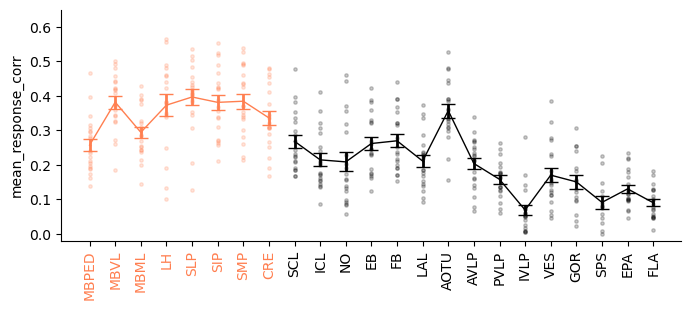

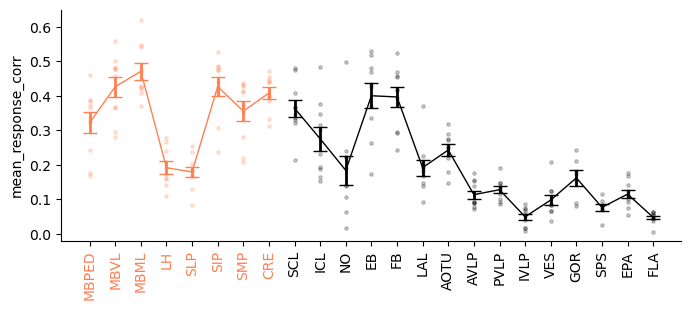

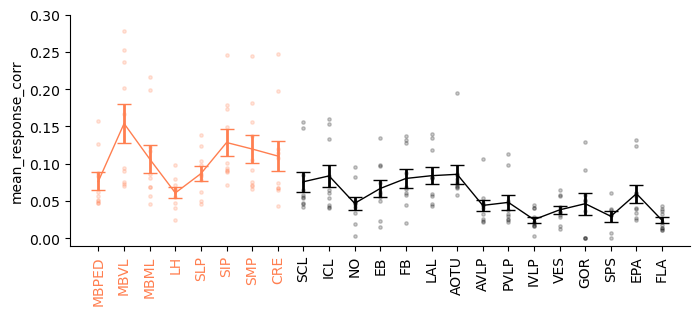

In [6]:
for i in range(3):
    if i==0:
        mean_response = data_g7f
    elif i==1:
        mean_response = data_ach
    else:
        mean_response = data_5ht

    num_fly = np.size(mean_response,0)
    plt.figure(figsize = (8,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    the_mean = np.zeros(len(br_index))
    the_std = np.zeros(len(br_index))
    for j in range(len(br_index)):
        aa = np.squeeze(mean_response[:,j])
        the_mean[j] = np.nanmean(aa)
        the_std[j] = np.nanstd(aa,ddof = 1)/math.sqrt(len(aa[~np.isnan(aa)]))
    ## bar
    # plt.bar(np.squeeze(np.where(br_olf==1)), the_mean[br_olf==1], width=0.7,yerr = the_std[br_olf==1],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='coral',linewidth=1.5,label = 'Olfactory Region')
    # plt.bar(np.squeeze(np.where(br_olf==0)), the_mean[br_olf==0], width=0.7,yerr = the_std[br_olf==0],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='black',linewidth=1.5,label = 'Others')
    for j in range(num_region):
        a = np.squeeze(mean_response[:,j])
        plt.scatter(j*np.ones(num_fly),a,color = the_color_list[j],s = 6,alpha = 0.2)

    ## errorbar
    plt.errorbar(np.squeeze(np.where(br_olf==1)),the_mean[br_olf==1],yerr=the_std[br_olf==1],ecolor='coral',elinewidth=2,marker='.',mfc='coral',\
	mec='coral',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='coral', linewidth=1)   
    plt.errorbar(np.squeeze(np.where(br_olf==0)),the_mean[br_olf==0],yerr=the_std[br_olf==0],ecolor='black',elinewidth=2,marker='.',mfc='black',\
	mec='black',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='black', linewidth=1)  
    
    ## boxplot
    # list_acc_selected_nonzero=[]
    # for j in range(len(br_index)):
    #     aa = np.squeeze(mean_response[:,j])
    #     aa = aa[~np.isnan(aa)]
    #     aa = aa.tolist()
    #     list_acc_selected_nonzero.append(aa)
    # list_acc_selected_nonzero = np.array(list_acc_selected_nonzero,object)
    # plt.boxplot((list_acc_selected_nonzero[br_olf==0][:]).tolist(),
    #             medianprops={'color': 'black', 'linewidth': '1.5'},
    #             # meanline=True,
    #             # showmeans=True,
    #             # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    #             showfliers=True,
    #             positions= np.squeeze(np.where(br_olf==0)),
    #             boxprops = {'color': 'black', 'linewidth': '1.5'},
    #             whiskerprops = {'color': 'black', 'linewidth': '1.5'},
    #             capprops =  {'color': 'black', 'linewidth': '1.5'},
    #             flierprops={"marker": "o", "markerfacecolor": "black","markeredgecolor":"black", "markersize": 2})
    # plt.boxplot((list_acc_selected_nonzero[br_olf==1][:]).tolist(),
    #             medianprops={'color': 'red', 'linewidth': '1.5'},
    #             # meanline=True,
    #             # showmeans=True,
    #             # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    #             showfliers=True,
    #             positions= np.squeeze(np.where(br_olf==1)),
    #             boxprops = {'color': 'red', 'linewidth': '1.5'},
    #             whiskerprops = {'color': 'red', 'linewidth': '1.5'},
    #             capprops =  {'color': 'red', 'linewidth': '1.5'},
    #             flierprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor":"red","markersize": 2})





    plt.xticks(range(len(br_index)),br_name,rotation=90)
    # plt.legend()
    plt.ylabel(the_filename)

    # ## significance
    # p_list = []
    # for j in range(len(br_name)):
    #     a = np.squeeze(mean_response[:,j])
    #     a = a[~np.isnan(a)]-y_chance[i]
        
    #     res = wilcoxon(a,alternative = 'greater')
    #     p = res.pvalue
    #     p_list.append(p)
    # p_list = np.array(p_list)
    # print(p_list)
    # for j in range(len(br_name)):
    #     p = p_list[j]
    #     if p<0.05 and p>=0.01:
    #         plt.text(j,y_chance[i],'*',verticalalignment = 'center', horizontalalignment = 'center')
    #     elif p<0.01 and p>0.001:
    #         plt.text(j,y_chance[i],'**',verticalalignment = 'center', horizontalalignment = 'center')
    #     elif p<0.001 and p>=0.0001:
    #         plt.text(j,y_chance[i],'***',verticalalignment = 'center', horizontalalignment = 'center') 
    #     elif p<0.0001:
    #         plt.text(j,y_chance[i],'****',verticalalignment = 'center', horizontalalignment = 'center') 
    
    if i == 2:
        plt.ylim((-0.01,0.3))
    else:
        plt.ylim((-0.02,0.65))
    for j in range(len(br_index)):
        if br_olf[j]==1:
            plt.gca().get_xticklabels()[j].set_color('coral') 
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path_1 + '/' + the_filename + '_map' + '_C'+str(i)+'.pdf',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path_1 + '/' + the_filename + '_map' + '_C'+str(i)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.show()  